# Trabalho de Aprendizado de Máquinas

## Aluno: João Lucas Duim

In [1]:
library(dplyr)
library(tidyr)
library(ggplot2)
#install.packages("gridExtra")
library(gridExtra)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'gridExtra' was built under R version 3.6.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



## 1. Introdução

Carreguemos os dados que utilizaremos e vejamos um pouco de sua estrutura:

In [2]:
bikeshare = read.csv("Bikeshare.csv") # Lê os dados

glimpse(bikeshare) # Apresenta as dimensões do dataset, além de nome, tipo e os primeiros valores das variáveis 

Observations: 8,645
Variables: 16
$ X          <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1...
$ season     <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...
$ mnth       <fct> Jan, Jan, Jan, Jan, Jan, Jan, Jan, Jan, Jan, Jan, Jan, J...
$ day        <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...
$ hr         <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16...
$ holiday    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ weekday    <int> 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,...
$ workingday <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ weathersit <fct> clear, clear, clear, clear, clear, cloudy/misty, clear, ...
$ temp       <dbl> 0.24, 0.22, 0.22, 0.24, 0.24, 0.24, 0.22, 0.20, 0.24, 0....
$ atemp      <dbl> 0.2879, 0.2727, 0.2727, 0.2879, 0.2879, 0.2576, 0.2727, ...
$ hum        <dbl> 0.81, 0.80, 0.80, 0.75, 0.75, 0.75, 0.80, 0.86, 0.75, 0....
$ windspeed  <dbl>

Os dados a serem analisados são do sistema de bicicletas compartilhadas de Washington DC ao longo de $1$ ano. Os ciclistas podem alugar bicicletas de um local e retorná-las em um local diferente. Os dados foram obtidos através do [website](https://www.statlearning.com/resources-second-edition) do livro "An Introduction to Statistical Learning". Vejamos as primeiras linhas do dataset:

In [3]:
head(bikeshare) # Apresenta as primeiras linhas do dataset

X,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,bikers
1,1,Jan,1,0,0,6,0,clear,0.24,0.2879,0.81,0.0000,3,13,16
2,1,Jan,1,1,0,6,0,clear,0.22,0.2727,0.80,0.0000,8,32,40
3,1,Jan,1,2,0,6,0,clear,0.22,0.2727,0.80,0.0000,5,27,32
4,1,Jan,1,3,0,6,0,clear,0.24,0.2879,0.75,0.0000,3,10,13
5,1,Jan,1,4,0,6,0,clear,0.24,0.2879,0.75,0.0000,0,1,1
6,1,Jan,1,5,0,6,0,cloudy/misty,0.24,0.2576,0.75,0.0896,0,1,1


A variável "season" está codificada com $1$, $2$, $3$ e $4$ representando, respectivamente, o inverno, primavera, verão e outono. São registrados os dias ("day") do ano de $1$ a $365$, classificados por mês ("mnth"), dia da semana ("weekday"), se é feriado ("holiday" = $1$) ou não ("holiday" = $0$) e se é dia útil ("workingday" = $1$) ou não ("workingday" = $0$). Estão presentes a condição atmosférica ("weathersit"), a temperatura normalizada ("temp"), a sensação térmica normalizada ("atemp"), a umidade do ar ("hum") e a velocidade do vento normalizada ("windspeed"). As normalizações referidas são tais que o valor mínimo passa a ser $0$ e o valor máximo passa a ser $1$. Existem dois tipos de usuários: usuários casuais ("casual"), que alugam a bicicleta por uma taxa única, e usuários registrados ("registered"), que pagam uma taxa de associação anual em troca do aluguel ilimitado de bicicletas. Assim, o total de ciclistas ("bikers") é dado pela soma de usuários casuais com usuários registrados ("bikers" = "casual" + "registered"). As medições foram feitas por hora ("hr").

## 2. Verificação de limpeza

A seguir, verificaremos se há alguma observação incompleta no dataset:

In [4]:
is.null(bikeshare) # Confere se há algum dado null

[1] FALSE

In [5]:
summary(is.na(bikeshare)) # Confere se há algum dado NA

     X             season           mnth            day         
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:8645      FALSE:8645      FALSE:8645      FALSE:8645     
     hr           holiday         weekday        workingday     
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:8645      FALSE:8645      FALSE:8645      FALSE:8645     
 weathersit         temp           atemp            hum         
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:8645      FALSE:8645      FALSE:8645      FALSE:8645     
 windspeed         casual        registered        bikers       
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:8645      FALSE:8645      FALSE:8645      FALSE:8645     

Logo, o dataset está limpo e pronto para ser analisado.

## 3. Análise Exploratória

Agora, faremos uma análise exploratória dos dados em questão a fim de compreender melhor as informações que eles carregam.

Para começar, veremos resumos de medidas sobre as variáveis que quantificam os usuários do serviço:

In [6]:
summary(bikeshare$casual) # Apresenta um resumo de medidas a respeito da variável casual

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     3.0    14.0    28.6    38.0   272.0 

In [7]:
summary(bikeshare$registered) # Apresenta um resumo de medidas a respeito da variável registered

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    26.0    90.0   115.2   168.0   567.0 

In [8]:
summary(bikeshare$bikers) # Apresenta um resumo de medidas a respeito da variável bikers

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    31.0   109.0   143.8   211.0   651.0 

Para facilitar a compreensão e comparação dessas medidas, veja os boxplots a seguir:

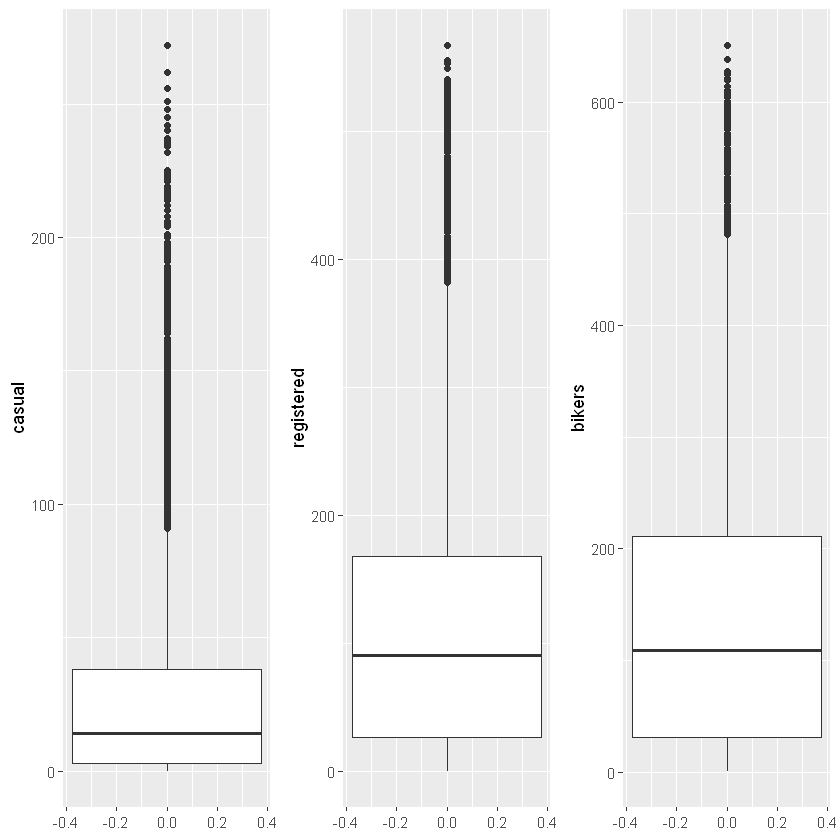

In [9]:
p1 <- ggplot(bikeshare) + geom_boxplot(aes(y=casual))
p2 <- ggplot(bikeshare) + geom_boxplot(aes(y=registered))
p3 <- ggplot(bikeshare) + geom_boxplot(aes(y=bikers))
grid.arrange(p1, p2, p3, nrow = 1)

Podemos ver desses gráficos que o número de clientes registrados costuma ser significativamente maior que o de clientes casuais.

Analisemos, então, parte dos dados agrupados por dia e por mês.

In [10]:
bikeshare_by_day <- bikeshare %>%
    group_by(day) %>% 
    summarise(temp=mean(temp),
        atemp=mean(atemp),
        hum=mean(hum),
        windspeed=mean(windspeed),
        bikers=sum(bikers)) 

In [11]:
head(bikeshare_by_day)

day,temp,atemp,hum,windspeed,bikers
1,0.3441667,0.3636250,0.8058333,0.16044583,985
2,0.3634783,0.3537391,0.6960870,0.24853913,801
3,0.1963636,0.1894045,0.4372727,0.24830909,1349
4,0.2000000,0.2121217,0.5904348,0.16029565,1562
5,0.2269565,0.2292696,0.4369565,0.18690000,1600
6,0.2043478,0.2332087,0.5182609,0.08956522,1606


No gráfico a seguir, visualizamos o número total de ciclistas por temperatura média diária em cada observação.

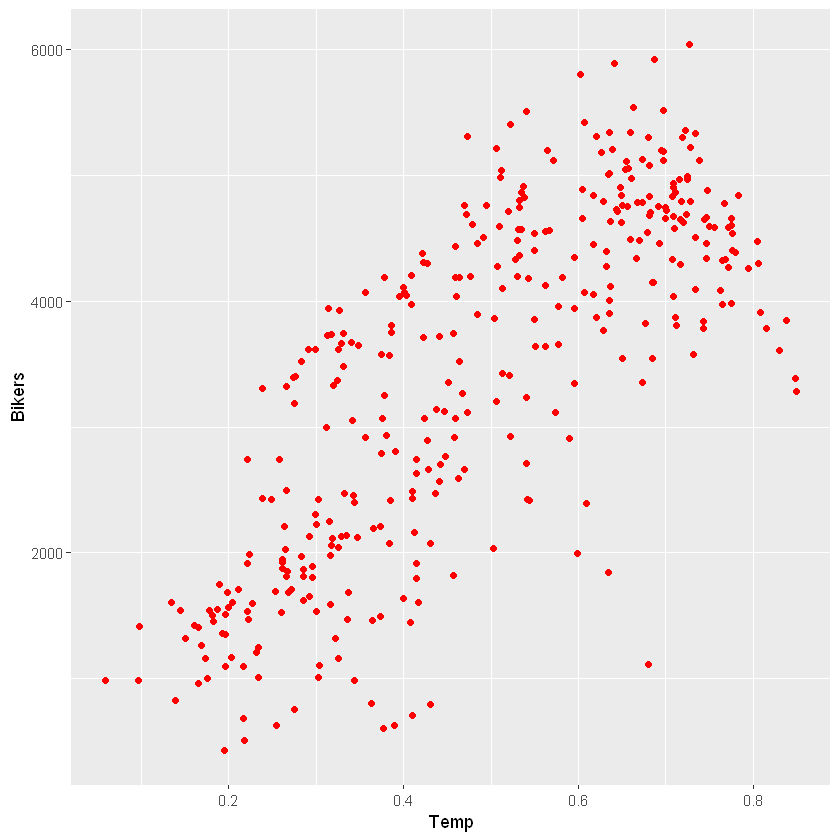

In [12]:
ggplot(bikeshare_by_day) +
    aes(y=bikers,x=temp) +
    geom_point(color="red") +
    labs(x="Temp",
        y="Bikers")

Aparentemente, existe uma tendência de se ter mais ciclistas quando o dia está mais quente.

No gráfico a seguir, visualizamos o número total de ciclistas por sensação térmica média diária em cada observação.

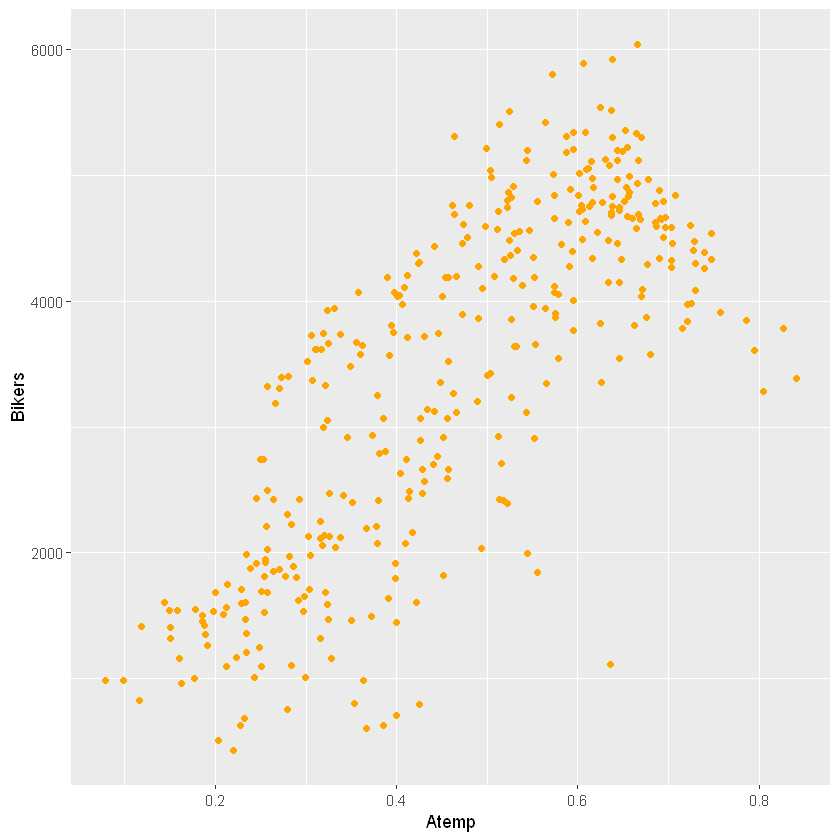

In [13]:
ggplot(bikeshare_by_day) +
    aes(y=bikers,x=atemp) +
    geom_point(color="orange") +
    labs(x="Atemp",
        y="Bikers")

Aparentemente, existe uma tendência de se ter mais ciclistas quando se tem a sensação de o dia estar mais quente.

No gráfico a seguir, visualizamos o número total de ciclistas por umidade do ar média diária em cada observação.

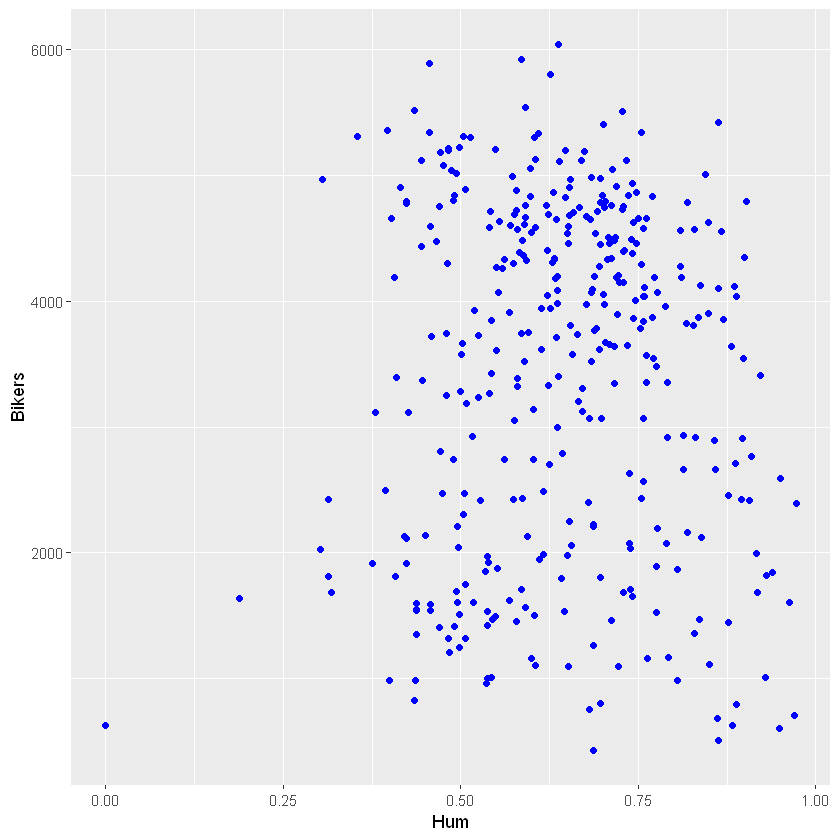

In [14]:
ggplot(bikeshare_by_day) +
    aes(y=bikers,x=hum) +
    geom_point(color="blue") +
    labs(x="Hum",
        y="Bikers")

Aparentemente, a umidade do ar não tem uma influência clara, à primeira vista, sobre a quantidade de ciclistas.

No gráfico a seguir, visualizamos o número total de ciclistas por velocidade do vento média diária em cada observação.

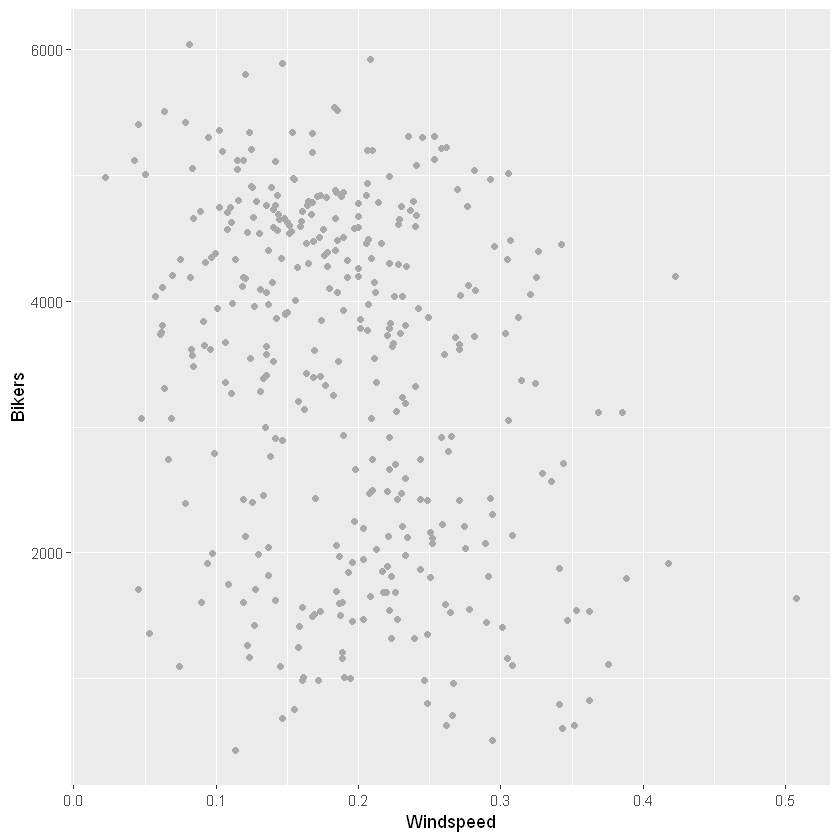

In [15]:
ggplot(bikeshare_by_day) +
    aes(y=bikers,x=windspeed) +
    geom_point(color="darkgray") +
    labs(x="Windspeed",
        y="Bikers")

Aparentemente, a velocidade do vento também não tem uma influência clara, à primeira vista, sobre a quantidade de ciclistas.

In [16]:
bikeshare_by_mnth <- bikeshare %>%
    group_by(mnth) %>% 
    summarise(temp=mean(temp),
        atemp=mean(atemp),
        hum=mean(hum),
        windspeed=mean(windspeed),
        bikers=sum(bikers)) 

In [17]:
head(bikeshare_by_mnth)

mnth,temp,atemp,hum,windspeed,bikers
April,0.4710153,0.4566241,0.6682197,0.2441047,94870
Aug,0.7055540,0.6556495,0.6256224,0.1881119,136691
Dec,0.3252901,0.3300323,0.6495277,0.1677912,87323
Feb,0.2839753,0.2857296,0.5597072,0.2294513,48215
Jan,0.1974128,0.2037578,0.5740552,0.1974850,38189
July,0.7585753,0.7106602,0.5896640,0.1716675,141341


No gráfico a seguir, visualizamos o número total de ciclistas por temperatura média mensal em cada observação.

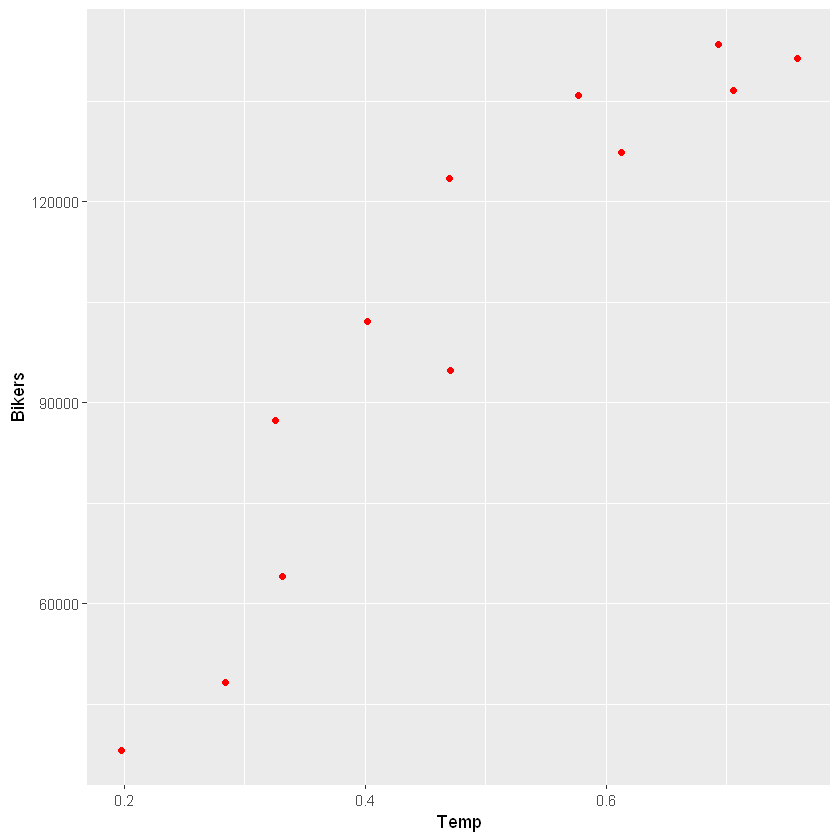

In [18]:
ggplot(bikeshare_by_mnth) +
    aes(y=bikers,x=temp) +
    geom_point(color="red") +
    labs(x="Temp",
        y="Bikers")

Aparentemente, a relação entre a temperatura média mensal e o número total de ciclistas é aproximadamente linear.

No gráfico a seguir, visualizamos o número total de ciclistas por sensação térmica média mensal em cada observação.

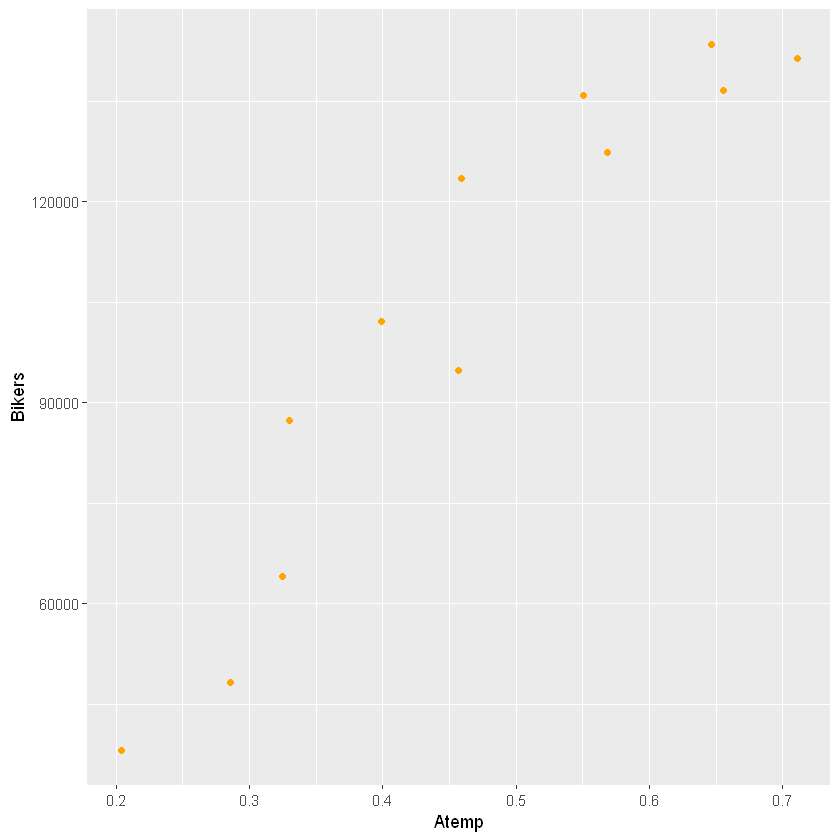

In [19]:
ggplot(bikeshare_by_mnth) +
    aes(y=bikers,x=atemp) +
    geom_point(color="orange") +
    labs(x="Atemp",
        y="Bikers")

Aparentemente, a relação entre a sensação térmica média mensal e o número total de ciclistas também é aproximadamente linear.

No gráfico a seguir, visualizamos o número total de ciclistas por umidade do ar média mensal em cada observação.

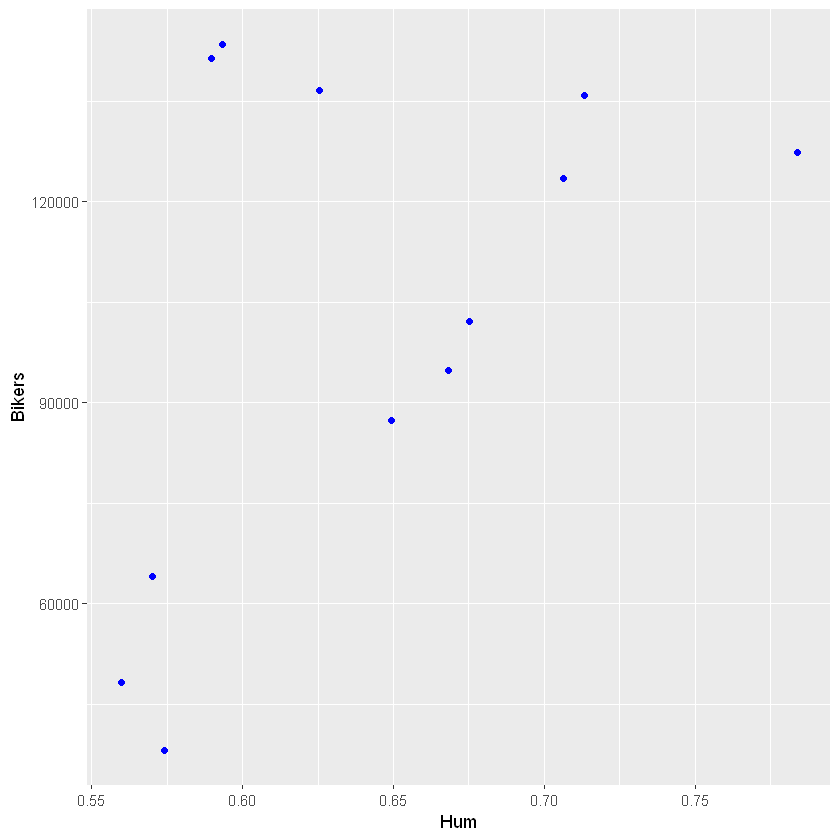

In [20]:
ggplot(bikeshare_by_mnth) +
    aes(y=bikers,x=hum) +
    geom_point(color="blue") +
    labs(x="Hum",
        y="Bikers")

Aparentemente, a correlação entre a umidade do ar média mensal e o número total de ciclistas é positiva.

No gráfico a seguir, visualizamos o número total de ciclistas por velocidade do vento média mensal em cada observação.

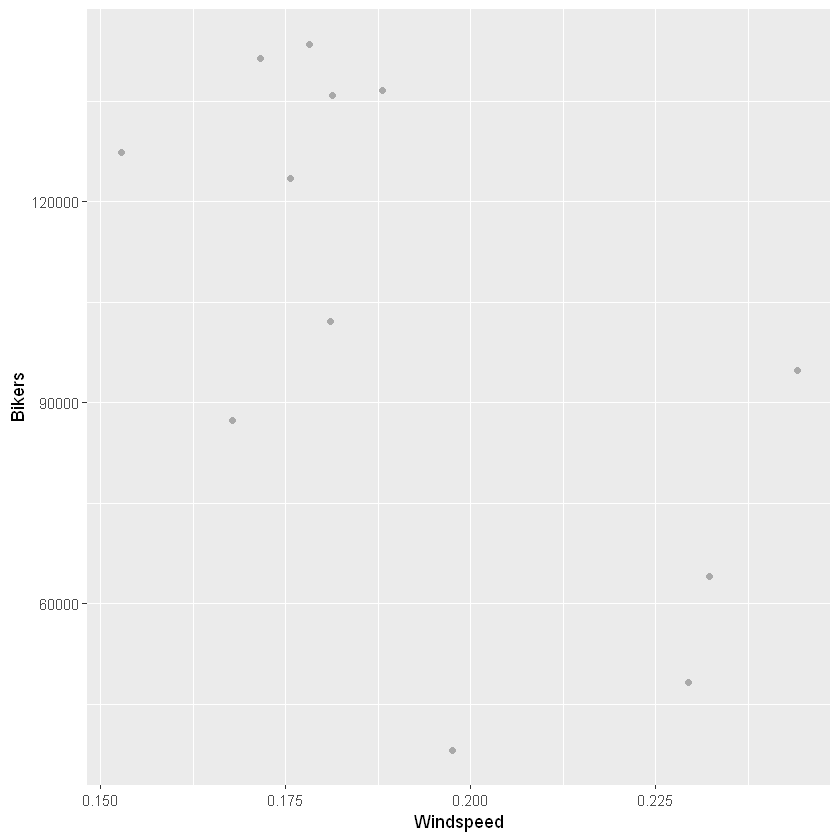

In [21]:
ggplot(bikeshare_by_mnth) +
    aes(y=bikers,x=windspeed) +
    geom_point(color="darkgray") +
    labs(x="Windspeed",
        y="Bikers")

Aparentemente, a correlação entre a velocidade do vento média mensal e o número total de ciclistas é negativa.

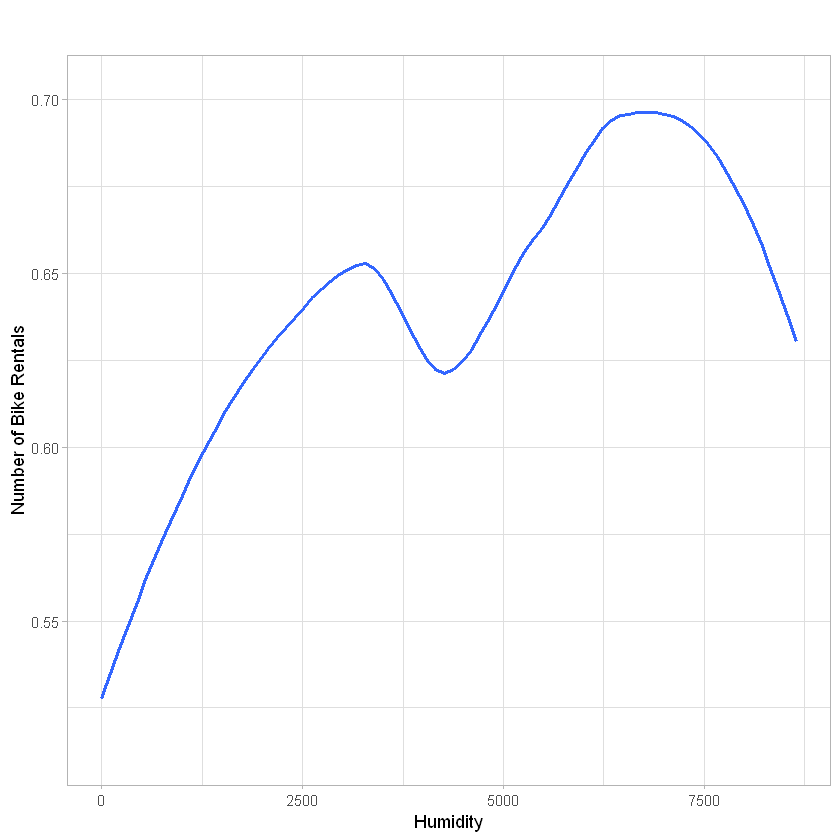

In [22]:
ggplot(bikeshare, aes(x = X, y = hum)) +
  geom_smooth(method = 'loess', fill = NA, size = 1) +
  theme_light(base_size = 11) +
  xlab("Humidity") +
  ylab("Number of Bike Rentals") +
  ggtitle("\n") +
  scale_color_discrete(name = "Type of Weather:",
                       breaks = c(1, 2, 3, 4),
                       labels = c("Clear or Cloudy", 
                                  "Mist", 
                                  "Light Rain or Snow", 
                                  "")) +
  theme(plot.title = element_text(size = 11, face="bold"))

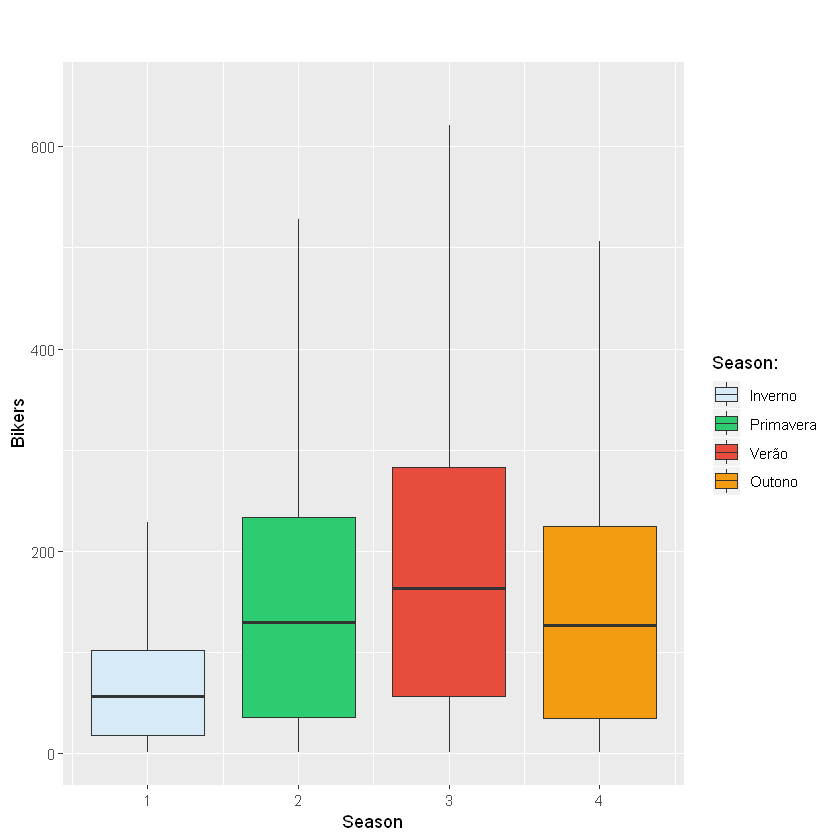

In [23]:
# Boxplot do número de ciclistas por estação do ano
ggplot(bikeshare, aes(x = season, y = bikers, fill = factor(season))) +
    geom_boxplot(outlier.color = adjustcolor("black", alpha.f = 0), na.rm = TRUE) +
    xlab("Season") +
    ylab("Bikers") +
    ggtitle("\n") +
    scale_fill_manual(values = c("#D6EAF8", "#2ECC71", "#E74C3C", "#F39C12"), 
        name="Season:",
        breaks=c(1, 2, 3, 4),
        labels=c("Inverno", "Primavera", "Verão", "Outono"))

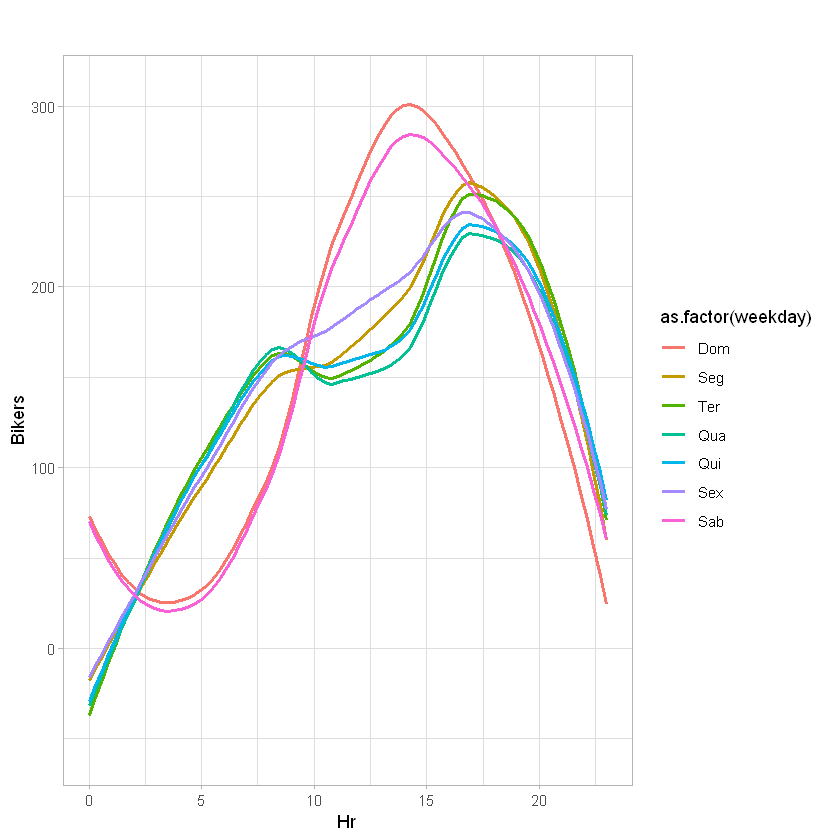

In [24]:
# Lineplot do número de ciclistas por hora do dia
ggplot(bikeshare, aes(x = hr, y = bikers, color = as.factor(weekday))) +
    geom_smooth(method = "loess", fill = NA, size = 1) +
    theme_light(base_size = 11) +
    xlab("Hr") +
    ylab("Bikers") +
    ggtitle("\n") +
    #scale_color_discrete("") +
    scale_color_hue(labels = c("Dom", "Seg", "Ter", "Qua", "Qui", "Sex", "Sab")) +
    theme(plot.title = element_text(size = 11, face="bold"))

Warning message:
"Ignoring unknown parameters: outlier.colour"ERROR while rich displaying an object: Error: stat_bin() must not be used with a y aesthetic.

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. r

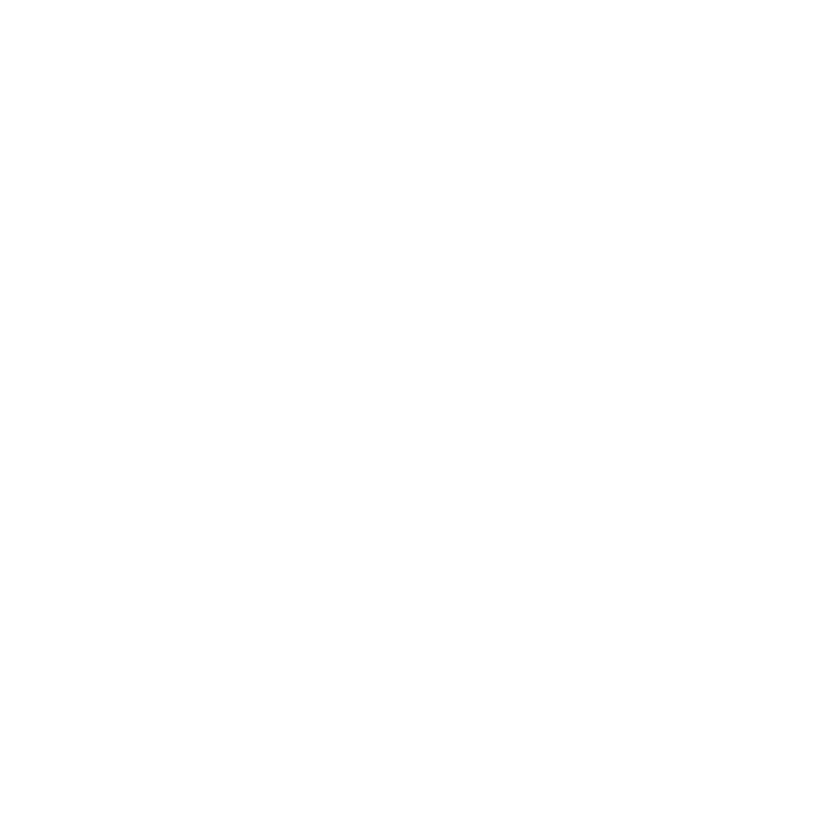

In [25]:
# Boxplot do número de ciclistas por estação do ano
ggplot(bikeshare, aes(x = day, y = bikers, fill = factor(season))) +
    geom_histogram(outlier.color = adjustcolor("black", alpha.f = 0), na.rm = TRUE) +
    xlab("Season") +
    ylab("Bikers") +
    ggtitle("\n") +
    scale_fill_manual(values = c("#D6EAF8", "#2ECC71", "#E74C3C", "#F39C12"), 
        name="Season:",
        breaks=c(1, 2, 3, 4),
        labels=c("Inverno", "Primavera", "Verão", "Outono"))

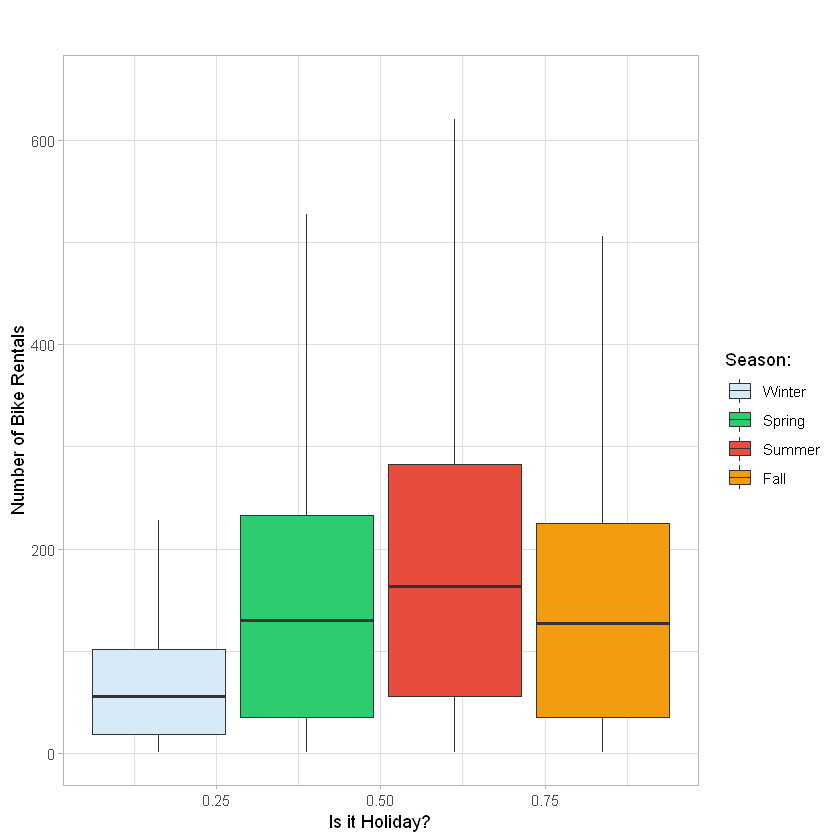

In [26]:
# Boxplot do número de ciclistas por feriado ????????????????????????????????????????????????????????????????????????????
ggplot(bikeshare, aes(x = holiday, y = bikers, fill = factor(season))) +
  geom_boxplot(outlier.color = adjustcolor("black", alpha.f = 0), na.rm = TRUE) +
  theme_light(base_size = 11) +
  xlab("Is it Holiday?") +
  ylab("Number of Bike Rentals") +
  ggtitle("\n") +
  scale_fill_manual(values=c("#D6EAF8", "#2ECC71", "#E74C3C", "#F39C12"), 
                    name="Season:",
                    breaks=c(1, 2, 3, 4),
                    labels=c("Winter", "Spring", "Summer", "Fall")) +
  theme(plot.title = element_text(size = 11, face="bold"))

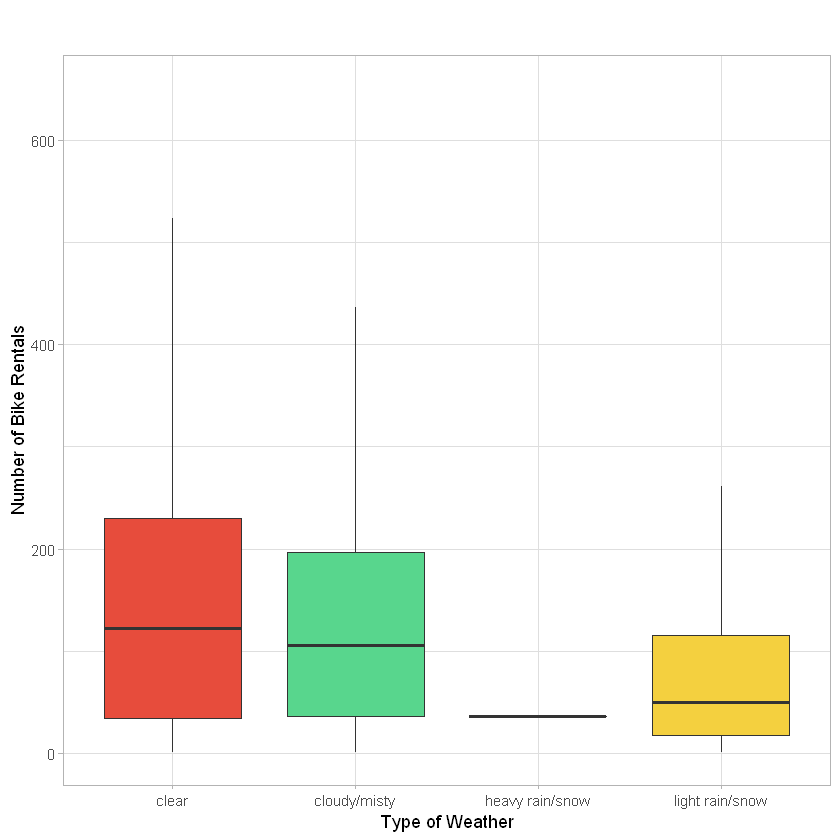

In [27]:
# boxplot of rentals v.s. weather
ggplot(bikeshare, aes(x = weathersit, y = bikers, fill = weathersit)) +
  geom_boxplot(outlier.color = adjustcolor("black", alpha.f = 0), na.rm = TRUE) +
  theme_light(base_size = 11) +
  xlab("Type of Weather") +
  ylab("Number of Bike Rentals") +
  ggtitle("\n") +
  scale_fill_manual(values = c("#E74C3C", "#58D68D", "#5DADE2", "#F4D03F"), 
                    name = "Type of Weather:",
                    breaks = c(1, 2, 3, 4),
                    labels = c("\n Clear or Cloudy \n", 
                             "\n Mist \n", 
                             "\n Light Rain \n or Light Snow \n", 
                             "\n BAD WEATHER \n")) +
  theme(plot.title = element_text(size = 11, face="bold"))

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


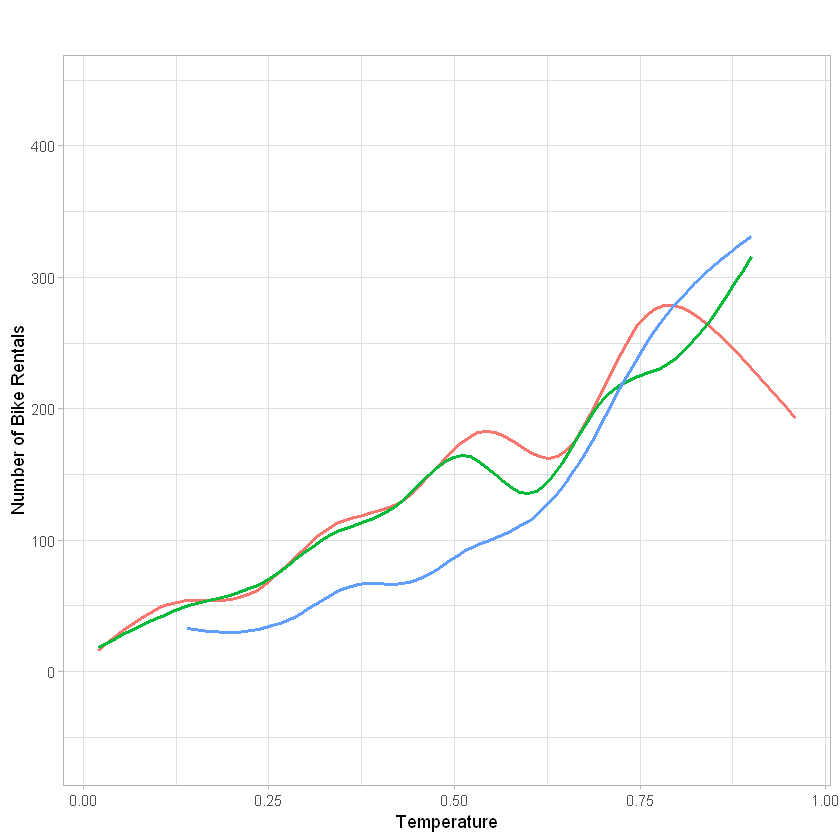

In [28]:
# line plot of rental v.s. temperature
ggplot(bikeshare, aes(x = temp, y = bikers, color = weathersit)) +
  geom_smooth(fill = NA, size = 1) +
  theme_light(base_size = 11) +
  xlab("Temperature") +
  ylab("Number of Bike Rentals") +
  ggtitle("\n") +
  scale_color_discrete(name = "Type of Weather:",
                       breaks = c(1, 2, 3, 4),
                       labels = c("Clear or Cloudy", 
                                  "Mist", 
                                  "Light Rain or Snow", 
                                  "")) +
  theme(plot.title = element_text(size = 11, face="bold"))

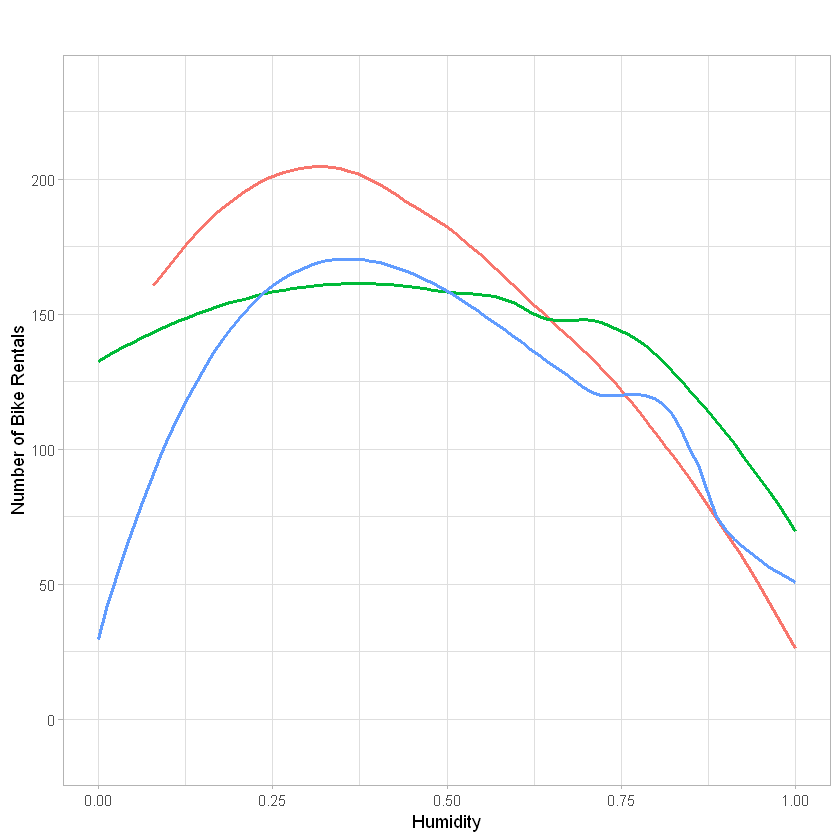

In [29]:
# line plot of rental v.s. humidity
ggplot(bikeshare, aes(x = hum, y = bikers, color = weathersit)) +
  geom_smooth(method = 'loess', fill = NA, size = 1) +
  theme_light(base_size = 11) +
  xlab("Humidity") +
  ylab("Number of Bike Rentals") +
  ggtitle("\n") +
  scale_color_discrete(name = "Type of Weather:",
                       breaks = c(1, 2, 3, 4),
                       labels = c("Clear or Cloudy", 
                                  "Mist", 
                                  "Light Rain or Snow", 
                                  "")) +
  theme(plot.title = element_text(size = 11, face="bold"))

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


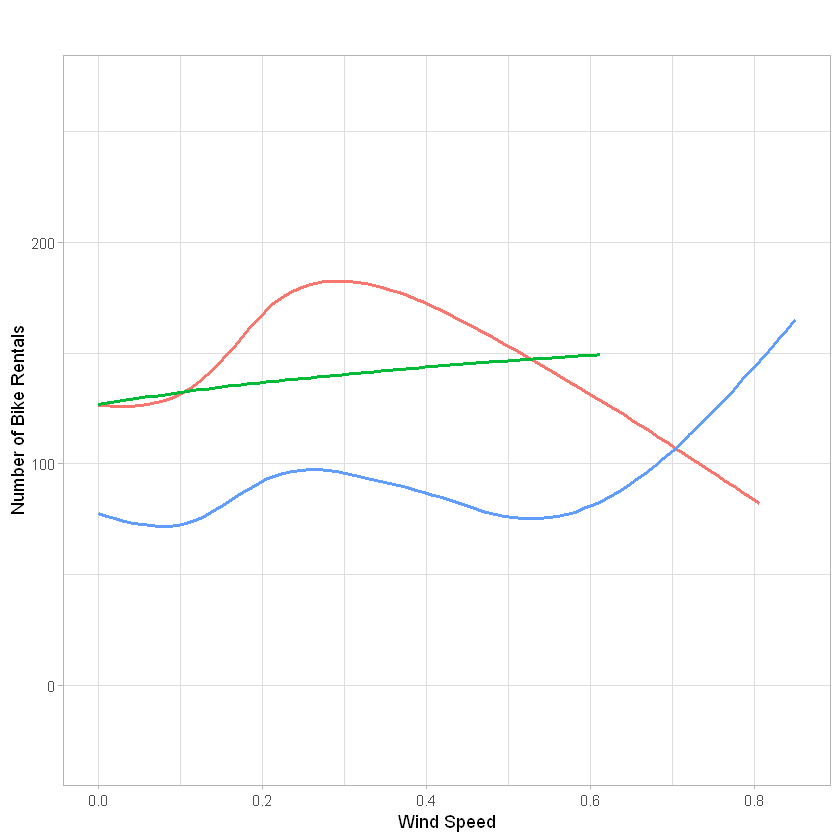

In [30]:
# line plot of rental v.s. wind speed
ggplot(bikeshare, aes(x = windspeed, y = bikers, color = weathersit)) +
  geom_smooth(fill = NA, size = 1) +
  theme_light(base_size = 11) +
  xlab("Wind Speed") +
  ylab("Number of Bike Rentals") +
  ggtitle("\n") +
  scale_color_discrete(name = "Type of Weather:",
                       breaks = c(1, 2, 3, 4),
                       labels = c("Clear or Cloudy", 
                                  "Mist", 
                                  "Light Rain or Snow", 
                                  "")) +
  theme(plot.title = element_text(size = 11, face="bold"))

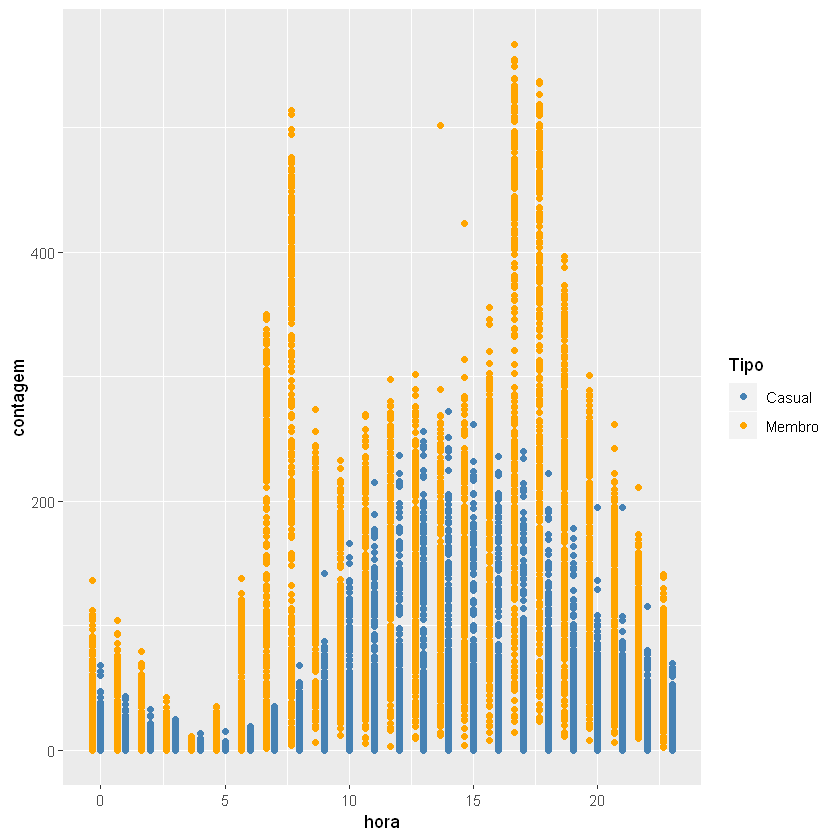

In [31]:
ggplot(bikeshare) + 
  geom_point(aes(x=hr,y=casual,color="steelblue"))+
  geom_point(aes(x=as.numeric(hr)-0.35,y=registered,color="orange"))+
  scale_color_identity(name = "Tipo",
                          breaks = c("steelblue", "orange"),
                          labels = c("Casual", "Membro"),
                          guide = "legend")+
  labs(x="hora",y="contagem")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


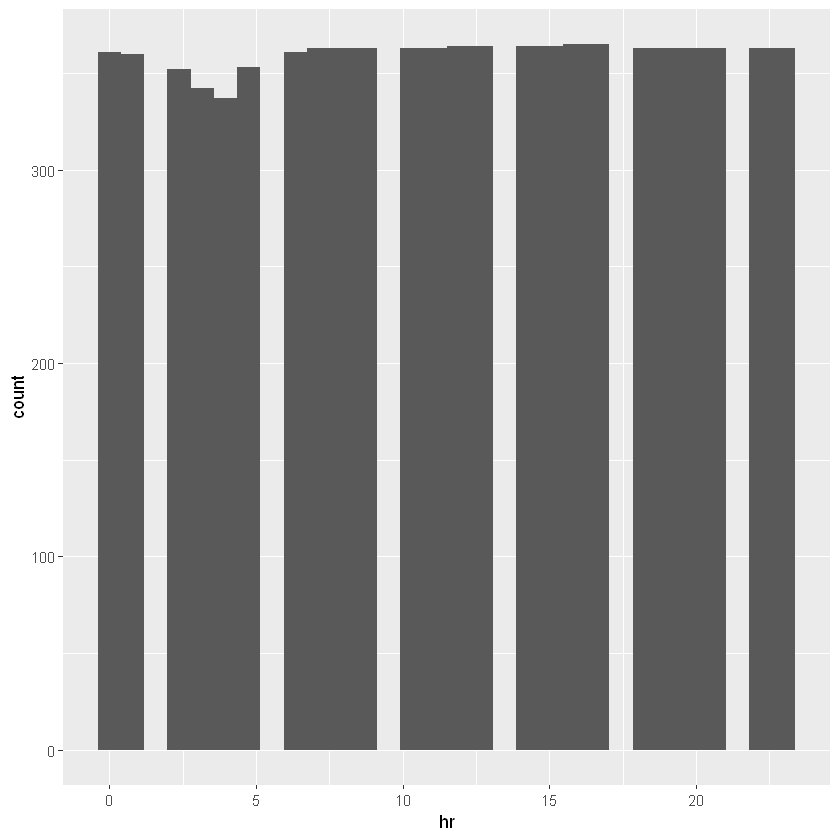

In [32]:
ggplot(data=bikeshare, aes(hr)) + 
  geom_histogram()